In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv(r"C:\Users\kush\Desktop\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.loc[:, 'Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
data['timestamp'] = [x for x in range(len(data))]

In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'timestamp'],
      dtype='object')

In [15]:
data = data.sort_values(by='timestamp')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 32 columns):
Time         284807 non-null float64
V1           284807 non-null float64
V2           284807 non-null float64
V3           284807 non-null float64
V4           284807 non-null float64
V5           284807 non-null float64
V6           284807 non-null float64
V7           284807 non-null float64
V8           284807 non-null float64
V9           284807 non-null float64
V10          284807 non-null float64
V11          284807 non-null float64
V12          284807 non-null float64
V13          284807 non-null float64
V14          284807 non-null float64
V15          284807 non-null float64
V16          284807 non-null float64
V17          284807 non-null float64
V18          284807 non-null float64
V19          284807 non-null float64
V20          284807 non-null float64
V21          284807 non-null float64
V22          284807 non-null float64
V23          284807 non-null float64
V

In [17]:
data[data['Class']==1].describe()    # Describing the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,timestamp
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0,119295.058943
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0,83286.184012
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0,541.000000
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0,42780.250000
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0,119747.500000
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0,189615.500000
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0,281674.000000


In [18]:
# Scaling the Time and Amount features
data['Scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['Scaled_Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,timestamp,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,2,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,3,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4,-0.073403,-1.996541


In [19]:
# Splitting the data into input features (X), and output target (Y)
X = data.iloc[:, (data.columns != "Class") & (data.columns != 'timestamp')]
Y = data.iloc[:, (data.columns == "Class")]

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541


In [21]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [22]:
data.shape

(284807, 32)

In [23]:
split_size = 0.7

In [24]:
len(X)

284807

In [25]:
X_train = X.iloc[:int(split_size*len(X)), :]

In [26]:
y_train = Y.iloc[:int(split_size*len(X)), :]

In [27]:
X_test = X.iloc[int(split_size*len(X)):, :]
y_test = Y.iloc[int(split_size*len(X)):, :]

In [28]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 30) (199364, 1) (85443, 30) (85443, 1)


In [29]:
# Splitting the training and testing set
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [30]:
# Storing some test samples in hold-out variables for testing later
# X_test_ex = X_test.iloc[0]
# y_test_ex = y_test.iloc[0]

# X_test = X_test.iloc[1:]
# y_test = y_test.iloc[1:]

In [31]:
# Decision Tree

clf_1= DecisionTreeClassifier()
clf_1.fit(X_train, y_train)
pred = clf_1.predict(X_test)

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.60      0.67      0.63       108

    accuracy                           1.00     85443
   macro avg       0.80      0.83      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [33]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[85287    48]
 [   36    72]]


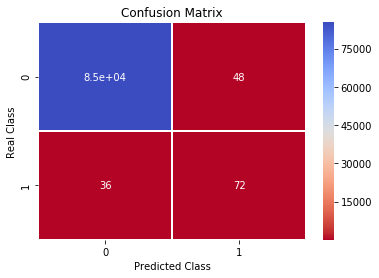

In [34]:
sns.heatmap(matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [35]:
# Calculating the Area Under the Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.83305208882639


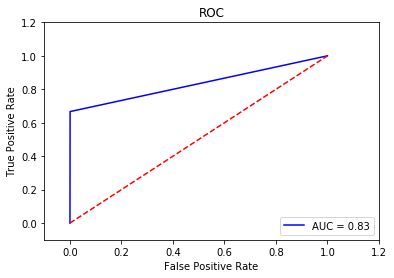

In [36]:
# Plotting the ROC Curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Trend Analysis

In [37]:
pred_train = clf_1.predict(X_train)

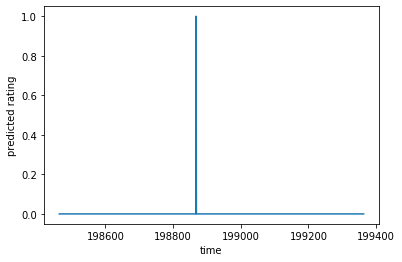

In [38]:
plt.plot(range(len(X_train)-900, len(X_train)), pred_train[len(X_train)-900: len(X_train)])
plt.xlabel('time')
plt.ylabel('predicted rating')
plt.show()

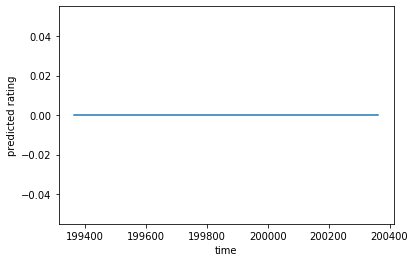

In [39]:
plt.plot(range(len(X_train), len(X_train)+len(X_test[:1000])), pred[:1000])
plt.xlabel('time')
plt.ylabel('predicted rating')
plt.show()

In [40]:
# Finding the important features from the data
clf_2 = RandomForestClassifier()
clf_2.fit(X, Y)
important_feat = pd.Series(clf_2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(important_feat)

C:\Users\kush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


V12              0.173287
V17              0.135256
V11              0.099754
V9               0.080211
V16              0.075922
V10              0.070783
V14              0.040911
V4               0.034314
V26              0.026467
V21              0.020060
V2               0.019285
V18              0.017379
V5               0.014503
V22              0.014365
V7               0.013659
V3               0.013605
V28              0.012930
V19              0.012695
V6               0.012614
Scaled_Amount    0.012139
V15              0.011923
V24              0.011726
V1               0.011683
Scaled_Time      0.011593
V13              0.010150
V27              0.009876
V8               0.009158
V20              0.008897
V25              0.007761
V23              0.007094
dtype: float64


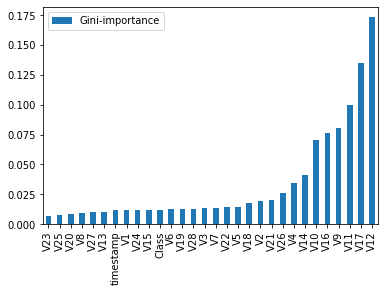

In [41]:
# Plotting the important features with respect to their importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, clf_2.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
plt.show()

In [42]:
# X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']], Y, 
                                                  #  test_size=0.30, random_state=50)
    

In [43]:
X_train_new = X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']].iloc[:int(split_size*len(X)), :]

In [44]:
y_train_new = Y.iloc[:int(split_size*len(X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']])), :]

In [45]:
X_test_new = X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']].iloc[int(split_size*len(X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']])):, :]
y_test_new = Y.iloc[int(split_size*len(X[['V4','V9','V10','V11','V12','V14','V16','V17','V18']])):, :]

In [46]:
print(X_train_new.shape, y_train_new.shape, X_test_new.shape, y_test_new.shape)

(199364, 9) (199364, 1) (85443, 9) (85443, 1)


In [47]:
X_train_new.head()

,V4,V9,V10,V11,V12,V14,V16,V17,V18
0,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195


In [48]:
y_train_new.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [49]:
clf_new_1= DecisionTreeClassifier()
clf_new_1.fit(X_train_new, y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
pred_new = clf_new_1.predict(X_test_new)

In [51]:
print(classification_report(y_test_new, pred_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.68      0.69      0.68       108

    accuracy                           1.00     85443
   macro avg       0.84      0.84      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [52]:
matrix_new = confusion_matrix(y_test_new, pred_new)
print(matrix_new)

[[85300    35]
 [   34    74]]


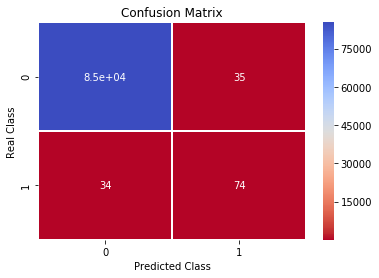

In [53]:
sns.heatmap(matrix_new, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, pred_new)
roc_auc_lr_new = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_new)

0.8423875184729465


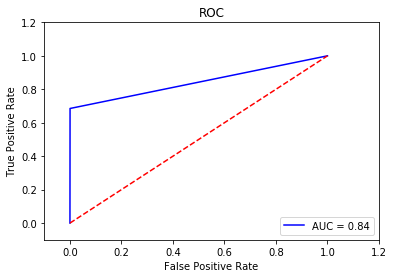

In [55]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_new)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Trend Analysis

In [56]:
pred_train_new = clf_new_1.predict(X_train_new)

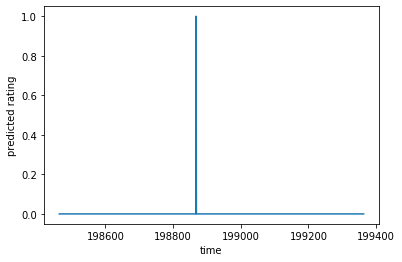

In [57]:
plt.plot(range(len(X_train_new)-900, len(X_train_new)), pred_train[len(X_train_new)-900: len(X_train_new)])
plt.xlabel('time')
plt.ylabel('predicted rating')
plt.show()

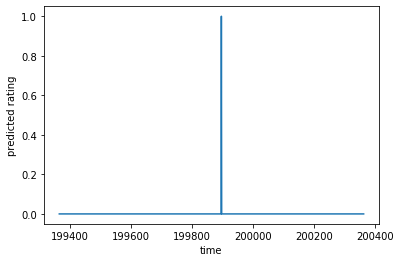

In [58]:
plt.plot(range(len(X_train_new), len(X_train_new)+len(X_test_new[:1000])), pred_new[:1000])
plt.xlabel('time')
plt.ylabel('predicted rating')
plt.show()

In [59]:
clf_new_2= RandomForestClassifier()
clf_new_2.fit(X_train_new, y_train_new)
pred_new_2 = clf_new_2.predict(X_test_new)

C:\Users\kush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [60]:
print(classification_report(y_test_new, pred_new_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.97      0.71      0.82       108

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [61]:
matrix_new = confusion_matrix(y_test_new, pred_new)
print(matrix_new)

[[85300    35]
 [   34    74]]


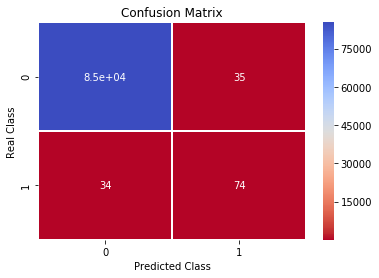

In [62]:
sns.heatmap(matrix_new, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, pred_new)
roc_auc_lr_new = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr_new)

0.8423875184729465


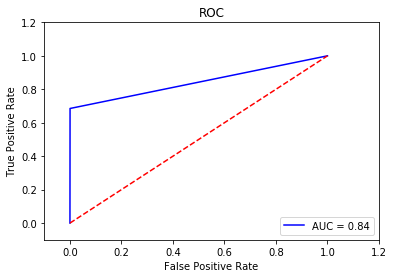

In [64]:
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_lr_new)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Trend Analysis

In [65]:
pred_train_new_2 = clf_new_1.predict(X_train_new)

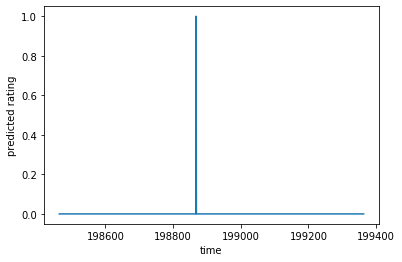

In [66]:
plt.plot(range(len(X_train_new)-900, len(X_train_new)), pred_train_new_2[len(X_train_new)-900: len(X_train_new)])
plt.xlabel('time')
plt.ylabel('predicted rating')
plt.show()

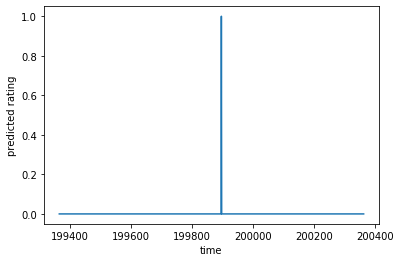

In [67]:
plt.plot(range(len(X_train_new), len(X_train_new)+len(X_test_new[:1000])), pred_new_2[:1000])
plt.xlabel('time')
plt.ylabel('predicted rating')
plt.show()